In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

# Convert feature data into 2-dimensional array
train_input = train_input.reshape(-1, 1)
test_input  = test_input.reshape(-1, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

# K-Nearest Neighbor regression model 
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [7]:
# If a perch which is 50 cm long, how much it'd be heavy?

print(knr.predict([[50]]))

[1033.33333333]


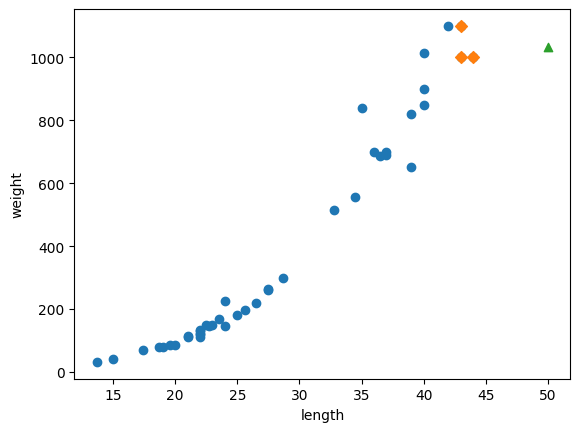

In [9]:
# According to the real experiment, it's estimated as around 1.5kg worth.
# Draw a scatter plot to visualize the current model trend and the problematic 50cm-long fish.

import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(50, 1033, marker = '^')     # the problematic fish which length is 50 cm
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [10]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [13]:
print(knr.predict([[50]]))
print(knr.predict([[100]]))

# The wrong expectations due to the limitation of KNN-regression model.

[1033.33333333]
[1033.33333333]


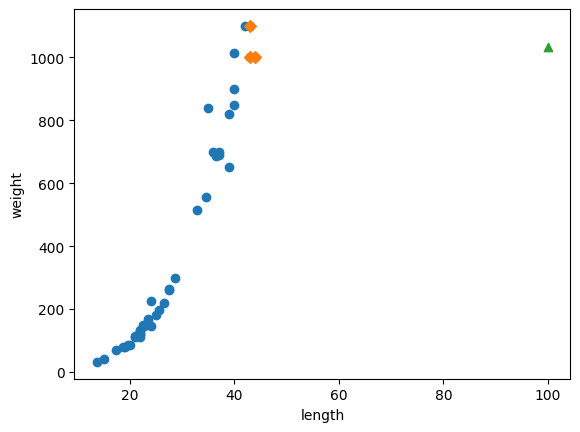

In [14]:
# The following scatter diagram explicitly shows that this model wouldn't expect
# the correct answer if the sample size exceeds more than around 40cm.

distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

plt.scatter(100, 1033, marker = '^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

**Linear** regression

A maching learning algorithm that expects answers according to the mathmatical solution related to linear function, including monomial and polynomial expressions.

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# Train the linear regression model which uses the very similar way with the previous one.
lr.fit(train_input, train_target)

# predict 50cm long perch's weight
print(lr.predict([[50]]))

[1241.83860323]


In [17]:
# Find the coefficient derived from the monomial expression for expectation of the given dataset.
# In monomial expressions, those would be generalized as "y = ax + b" which contains
# one coefficient and one y-intercept in that very directly. Those properties are stored in
# lr object.

print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


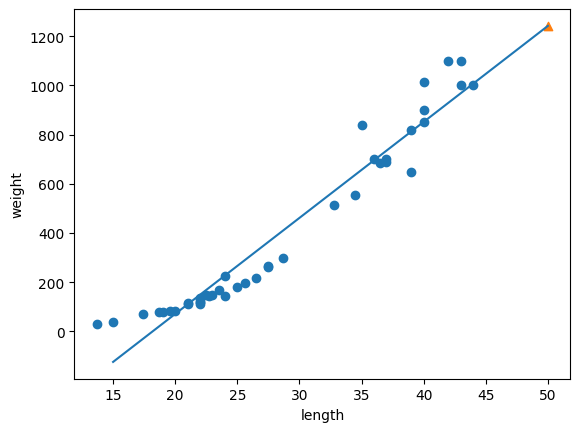

In [21]:
# Draw a scatter plot

plt.scatter(train_input, train_target)

# This line dictates to visualize the generated monomial expression from the model
plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker = '^')     # for 50cm-long perch
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [23]:
# Evaluate the model performance according to the accuracy

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

# underfitting detected

0.939846333997604
0.8247503123313558


**Linear** regression polynomially

\begin{equation}
y = ax^2 + bx + c
\end{equation}

`a`, `b`, and `c` would be the model parameter that would be expected from the regression model.

In [24]:
# Create and append for x^2

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly  = np.column_stack((test_input ** 2, test_input))

In [26]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [28]:
lr = LinearRegression()

# In training set, we added a column for x^2, but we won't do anything to the target dataset.
lr.fit(train_poly, train_target)

print(lr.predict([[50 ** 2, 50]]))

# The expectation changed more precisely.

[1573.98423528]


In [30]:
# Check the model paramter like "[x^2, x] b"

print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


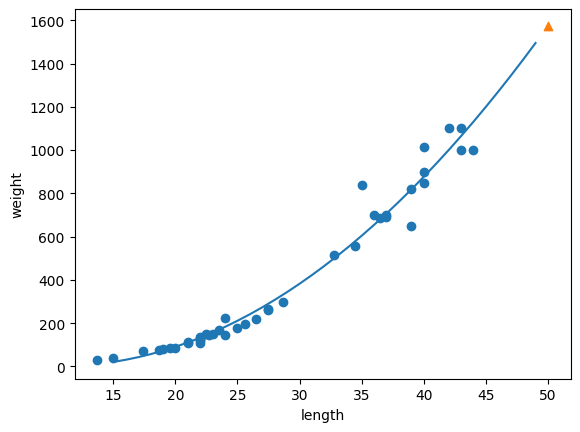

In [36]:
# Draw a scatter plot to visualize the newly-trained model

point = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0] * point ** 2 + lr.coef_[1] * point + lr.intercept_)    # for visualizing the polynominal from the model

plt.scatter(50, 1574, marker = '^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [37]:
# Evaluate the performance again!

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122
